In [1]:
!pip install linearmodels -q

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import linearmodels as lm
from platform import python_version
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import quad

print(python_version())

3.11.6


Question 2

In [3]:
dist = np.random.default_rng(seed=228)

In [4]:
Y = dist.normal(10, 0.25, 1000)
W = dist.normal(1, 0.25, 1000)
U_d = dist.normal(0, 1, 1000)
U_s = dist.normal(0, 1, 1000)

Text(0.5, 0, 'Y')

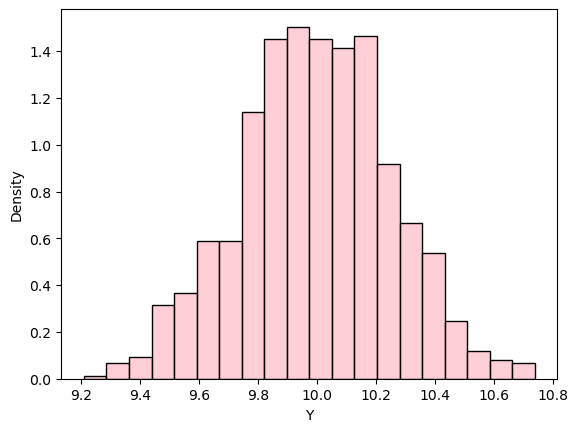

In [5]:
sns.histplot(Y, bins=20, color='pink', stat='density')
plt.xlabel('Y')

Text(0.5, 0, 'W')

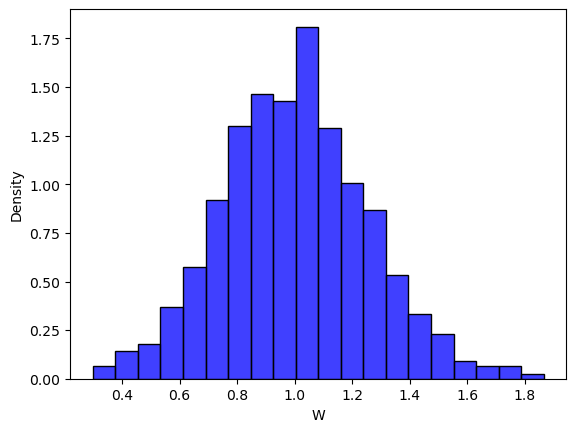

In [6]:
sns.histplot(W, bins=20, color='blue', stat='density')
plt.xlabel('W')

Text(0.5, 0, 'Ud')

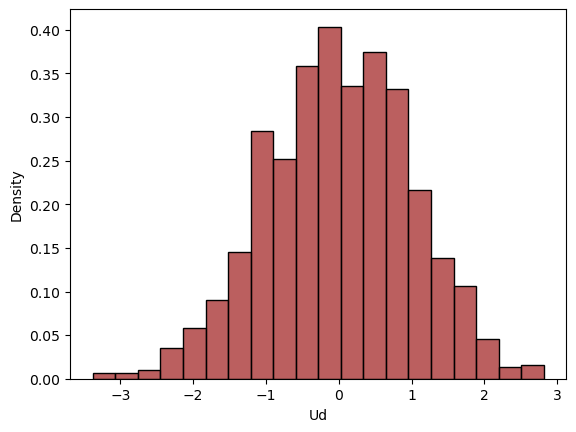

In [7]:
sns.histplot(U_d, bins=20, color='brown', stat='density')
plt.xlabel('Ud')

Text(0.5, 0, 'Us')

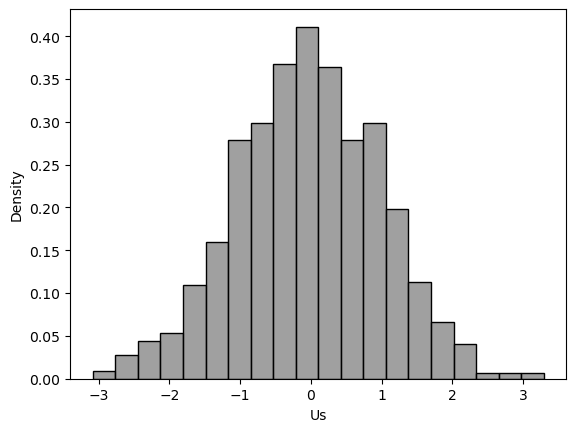

In [8]:
sns.histplot(U_s, bins=20, color='gray', stat='density')
plt.xlabel('Us')

In [9]:
a_0 = 30
a_1 = -2
a_2 = 1
b_0 = 5
b_1 = 3
b_2 = 2

In [10]:
P_eq = (b_0 - a_0 + b_2 * W - a_2 * Y + U_s - U_d) / (a_1 - b_1)
Q_d_eq = a_0 + a_1 * P_eq + a_2 * Y + U_d
Q_s_eq = b_0 + b_1 * P_eq + b_2 * W + U_s

In [11]:
main = pd.DataFrame({
    'Y': Y,
    'W': W,
    'U_d': U_d,
    'U_s': U_s,
    'P_eq': P_eq,
    'Q_d_eq': Q_d_eq,
    'Q_s_eq': Q_s_eq
})

In [12]:
main

,Y,W,U_d,U_s,P_eq,Q_d_eq,Q_s_eq
0,10.146165,0.909038,-0.876128,0.167309,6.456930,26.356176,26.356176
1,10.153966,1.004782,-0.286793,-0.239762,6.619474,26.628225,26.628225
2,9.997829,0.979539,-0.812346,-0.377743,6.520830,26.143824,26.143824
3,9.945159,1.046984,-0.233810,0.323335,6.458809,26.793731,26.793731
4,10.374450,0.886314,-1.010225,0.784540,6.361411,26.641402,26.641402
...,...,...,...,...,...,...,...
995,10.235723,1.616374,-0.004278,-0.497399,6.499219,27.233007,27.233007
996,9.957312,1.007623,0.140022,0.745775,6.467263,27.162809,27.162809
997,10.737747,0.651494,-0.539903,1.785446,6.421882,27.354080,27.354080
998,9.730122,0.864620,-0.537340,0.055765,6.481555,26.229672,26.229672


In [13]:
assert np.allclose(main["Q_d_eq"], main["Q_s_eq"])

Text(0.5, 0, 'Equilibrium Price')

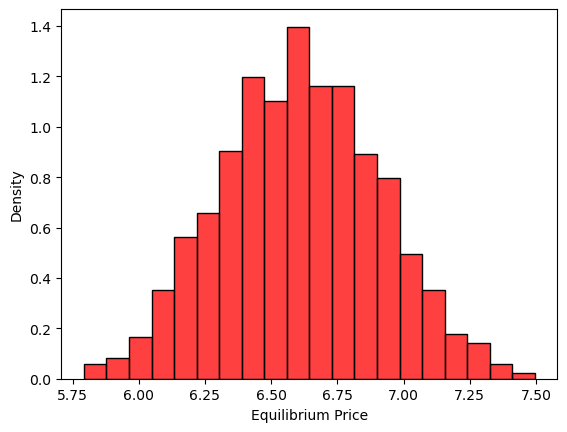

In [14]:
sns.histplot(P_eq, bins=20, color='red', stat='density')
plt.xlabel('Equilibrium Price')

In [15]:
main['P_eq'].describe()

count    1000.000000
mean        6.607335
std         0.298894
min         5.792829
25%         6.403818
50%         6.604242
75%         6.814650
max         7.495800
Name: P_eq, dtype: float64

Text(0.5, 0, 'Equilibrium Quantity')

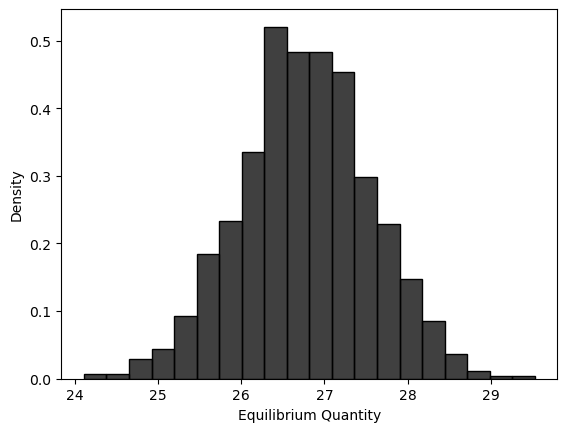

In [17]:
sns.histplot(Q_d_eq, bins=20, color='black', stat='density')
plt.xlabel('Equilibrium Quantity')

In [18]:
main['Q_d_eq'].describe()

count    1000.000000
mean       26.773575
std         0.788187
min        24.110097
25%        26.269251
50%        26.775386
75%        27.289736
max        29.528263
Name: Q_d_eq, dtype: float64

Question 3

In [19]:
q_3_d = sm.OLS(
    endog=main["Q_d_eq"],
    exog=sm.add_constant(main[["P_eq", "Y"]]),).fit()
print(q_3_d.summary())

                            OLS Regression Results                            
Dep. Variable:                 Q_d_eq   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.22
Date:                Fri, 14 Feb 2025   Prob (F-statistic):           1.08e-14
Time:                        18:48:24   Log-Likelihood:                -1148.2
No. Observations:                1000   AIC:                             2302.
Df Residuals:                     997   BIC:                             2317.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.5175      1.028     18.019      0.0

In [20]:
q_3_s = sm.OLS(
    endog=main["Q_s_eq"],
    exog=sm.add_constant(main[["P_eq", "W"]]),).fit()
print(q_3_s.summary())

                            OLS Regression Results                            
Dep. Variable:                 Q_s_eq   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     74.69
Date:                Fri, 14 Feb 2025   Prob (F-statistic):           5.94e-31
Time:                        18:48:25   Log-Likelihood:                -1110.6
No. Observations:                1000   AIC:                             2227.
Df Residuals:                     997   BIC:                             2242.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.1334      0.575     38.468      0.0

Question 4

In [21]:
q_4_d = lm.IV2SLS(
    dependent=main["Q_d_eq"],
    exog=sm.add_constant(main[["Y"]]),
    endog=main["P_eq"],
    instruments=main[["W"]],
).fit()
print(q_4_d.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:                 Q_d_eq   R-squared:                     -1.0332
Estimator:                    IV-2SLS   Adj. R-squared:                -1.0373
No. Observations:                1000   F-statistic:                    72.260
Date:                Fri, Feb 14 2025   P-value (F-stat)                0.0000
Time:                        18:48:28   Distribution:                  chi2(2)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          32.052     2.4042     13.332     0.0000      27.340      36.764
Y              1.2177     0.1591     7.6519     0.00

In [22]:
q_4_s = lm.IV2SLS(
    dependent=main["Q_s_eq"],
    exog=sm.add_constant(main[["W"]]),
    endog=main["P_eq"],
    instruments=main[["Y"]],
).fit()
print(q_4_s.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:                 Q_s_eq   R-squared:                     -1.4837
Estimator:                    IV-2SLS   Adj. R-squared:                -1.4887
No. Observations:                1000   F-statistic:                    62.654
Date:                Fri, Feb 14 2025   P-value (F-stat)                0.0000
Time:                        18:48:28   Distribution:                  chi2(2)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const         -2.2827     5.8293    -0.3916     0.6954     -13.708      9.1425
W              2.3562     0.3279     7.1850     0.00

Question 5

In [23]:
a_0_2sls = q_4_d.params['const']
a_1_2sls = q_4_d.params['P_eq']
a_2_2sls = q_4_d.params['Y']

b_0_2sls = q_4_s.params['const']
b_1_2sls = q_4_s.params['P_eq']
b_2_2sls = q_4_s.params['W']

W_mean = main['W'].mean()
Y_mean = main['Y'].mean()
U_s_mean = main['U_s'].mean()
U_d_mean = main['U_d'].mean()

In [24]:
main_tax_integrals = pd.DataFrame(columns=['t', 'P_eq_t', 'Q_d_eq_t', 'Q_s_eq_t', 'CS_int', 'PS_int', 'TR', 'DWL_int', 
                                'Q_0tax'])



for t in range(0, 16):
    P_eq_t = (b_0_2sls - a_0_2sls + b_2_2sls * W_mean - a_2_2sls * Y_mean + U_s_mean - U_d_mean- b_1_2sls * t) / (a_1_2sls - b_1_2sls) 
    Q_d_eq_t = a_0_2sls + a_1_2sls * P_eq_t + a_2_2sls * Y_mean + U_d_mean
    Q_s_eq_t = b_0_2sls + b_1_2sls * (P_eq_t - t) + b_2_2sls * W_mean + U_s_mean
    def cons_surp(q):
        return ((q - (a_0_2sls + a_2_2sls * Y_mean + U_d_mean))/a_1_2sls - P_eq_t)
    CS_int = quad(cons_surp, 0, Q_d_eq_t)[0]
    def prod_surp(q):
        return (P_eq_t - max(((q - (b_0_2sls + b_2_2sls * W_mean + U_s_mean))/b_1_2sls + t), 0))
    PS_int = quad(prod_surp, 0, Q_d_eq_t)[0]
    TR = t * Q_d_eq_t
    P_eq_0t = (b_0_2sls - a_0_2sls + b_2_2sls * W_mean - a_2_2sls * Y_mean + U_s_mean - U_d_mean) / (a_1_2sls - b_1_2sls)
    Q_d_eq_0t = a_0_2sls + a_1_2sls * P_eq_0t + a_2_2sls * Y_mean + U_d_mean
    def dwl(q):
        return -((q - (a_0_2sls + a_2_2sls * Y_mean + U_d_mean))/a_1_2sls - ((q - (b_0_2sls + b_2_2sls * W_mean + U_s_mean))/b_1_2sls + t))
    DWL_int = quad(dwl, Q_d_eq_t, Q_d_eq_0t)[0]
    
    main_tax_integrals.loc[len(main_tax_integrals)] = [t, P_eq_t, Q_d_eq_t, Q_s_eq_t, CS_int, PS_int, TR, DWL_int, Q_d_eq_0t]
    
main_tax_integrals  

,t,P_eq_t,Q_d_eq_t,Q_s_eq_t,CS_int,PS_int,TR,DWL_int,Q_0tax
0,0.0,6.613492,26.751212,26.751212,135.490921,88.541713,0.000000,0.000000,26.751212
1,1.0,7.218274,25.154062,25.154062,119.795231,78.284766,25.154062,0.798575,26.751212
2,2.0,7.823056,23.556912,23.556912,105.065469,68.659040,47.113825,3.194300,26.751212
3,3.0,8.427838,21.959763,21.959763,91.301635,59.664537,65.879288,7.187174,26.751212
4,4.0,9.032620,20.362613,20.362613,78.503728,51.301257,81.450451,12.777198,26.751212
5,5.0,9.637402,18.765463,18.765463,66.671748,43.569198,93.827315,19.964372,26.751212
6,6.0,10.242184,17.168313,17.168313,55.805696,36.468362,103.009880,28.748696,26.751212
7,7.0,10.846966,15.571164,15.571164,45.905572,29.998748,108.998145,39.130169,26.751212
8,8.0,11.451748,13.974014,13.974014,36.971375,24.160356,111.792110,51.108792,26.751212
9,9.0,12.056530,12.376864,12.376864,29.003106,18.953186,111.391776,64.684565,26.751212


In [25]:
assert np.allclose(main_tax_integrals["Q_d_eq_t"], main_tax_integrals["Q_s_eq_t"])

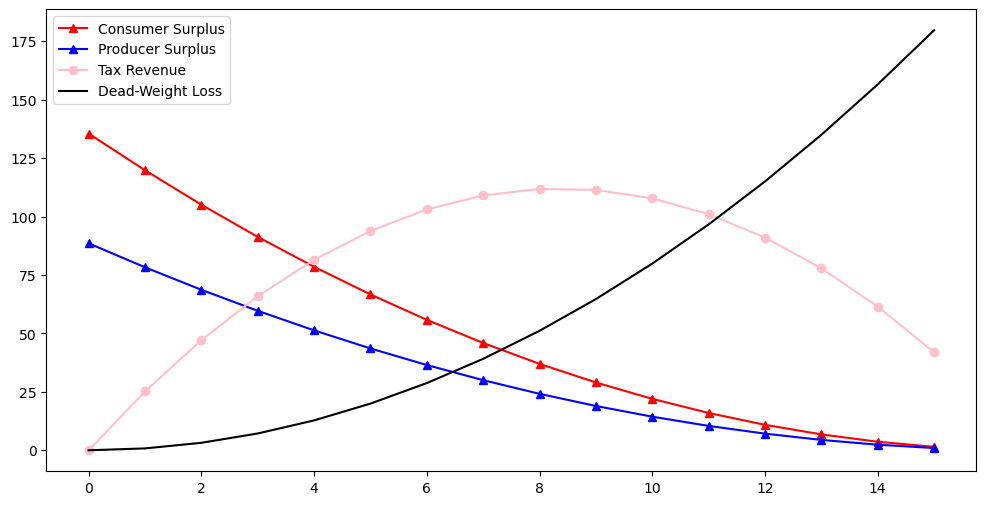

In [26]:
plt.figure(figsize=(12, 6))

plt.plot(main_tax_integrals['t'], main_tax_integrals['CS_int'], color='red', marker = '^', label = 'Consumer Surplus')
plt.plot(main_tax_integrals['t'], main_tax_integrals['PS_int'], color='blue', marker = '^', label = 'Producer Surplus')
plt.plot(main_tax_integrals['t'], main_tax_integrals['TR'], color='pink', marker = 'o', label = 'Tax Revenue')
plt.plot(main_tax_integrals['t'], main_tax_integrals['DWL_int'], color='black', label = 'Dead-Weight Loss')

plt.legend()